In [5]:
import sklearn, pyod
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, auc
from pyod.models.knn import KNN

print(sklearn.__version__, pyod.__version__)

1.7.2 2.0.5


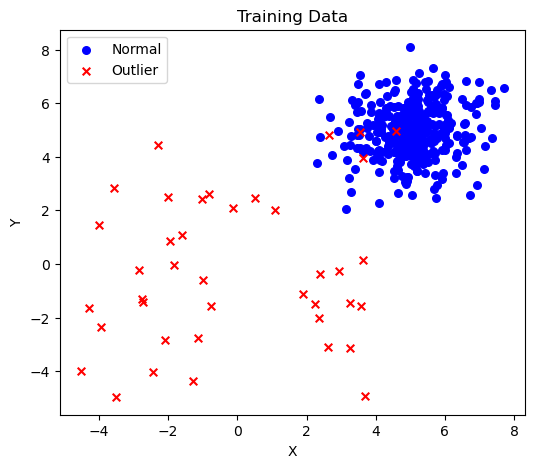

In [6]:

CONTAMINATION_RATE = 0.1

#EX 1
X_train, X_test, y_train, y_test = generate_data(
    n_train=400,
    n_test=100,
    n_features=2,
    contamination=CONTAMINATION_RATE,
    random_state=1
)

plt.figure(figsize=(6, 5))

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            c='blue', label='Normal', s=30)

plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            c='red', label='Outlier', s=30, marker='x')

plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [7]:
# Ex 2


# Fit the training data
model = KNN(contamination=CONTAMINATION_RATE)
model.fit(X_train)

# Predict the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train)
print(y_pred_test)



[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

In [8]:
# Confusion matrix -> TN,FP,FN,TP, balanced_score

def metrics(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred,labels=[0,1])
    TN, FP, FN, TP = conf_mat.ravel()
    balanced_score = balanced_accuracy_score(y_true, y_pred)
    return TN, FP, FN, TP, balanced_score

print(metrics(y_train, y_pred_train))
print(metrics(y_test, y_pred_test))


(np.int64(357), np.int64(3), np.int64(4), np.int64(36), 0.9458333333333333)
(np.int64(90), np.int64(0), np.int64(4), np.int64(6), 0.8)


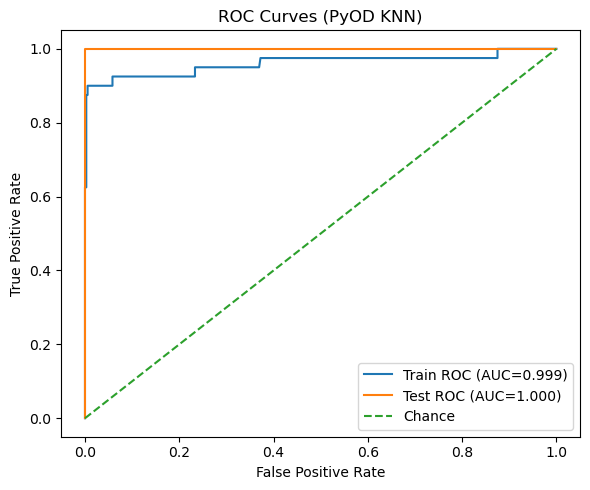

In [29]:
# ROC curves

decision_scores = model.decision_scores_

fpr_train, tpr_train, _ = roc_curve(y_train, decision_scores)
auc_train = auc(fpr_train, tpr_train)


scores_test = model.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6,5))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC={auc_train:.3f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC={auc_test:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (PyOD KNN)")
plt.legend()
plt.tight_layout()
plt.show()




In [10]:

# Test scores based on contamination

for c in [0.05, 0.1, 0.2, 0.3]:
    m = KNN(contamination=c).fit(X_train)
    yp_tr = m.predict(X_train)
    yp_te = m.predict(X_test)
    _, _, _, _, bal_tr_c = metrics(y_train, yp_tr)
    _, _, _, _, bal_te_c = metrics(y_test,  yp_te)
    print(f"contamination={c:.2f} -> balanced_acc [train]={bal_tr_c:.3f}, [test]={bal_te_c:.3f}")

contamination=0.05 -> balanced_acc [train]=0.675, [test]=0.650
contamination=0.10 -> balanced_acc [train]=0.946, [test]=0.800
contamination=0.20 -> balanced_acc [train]=0.915, [test]=0.850
contamination=0.30 -> balanced_acc [train]=0.874, [test]=0.783
